# Feature Engineering for Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import datetime
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

In [2]:
za_data = pd.read_csv("Classification/all_files_ZAv1.csv")

In [3]:
za_data.columns

Index(['trackAppearanceCount', 'artistAppearanceCount', 'rank', 'uri',
       'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank',
       'weeks_on_chart', 'streams', 'End Date', 'Week', 'Year', 'End Date Dt',
       'Seconds since Epoch', 'End Date Aggregated', 'ArtistCount',
       'main_artist', 'isTopTen', 'Artist and Track', 'rank difference',
       'Position over Time'],
      dtype='object')

In [4]:
len(list(za_data.columns))

23

In [5]:
za_data["End Date Dt"] = za_data["End Date Dt"].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))

In [6]:
za_data.shape

(57686, 23)

In [7]:
za_data_test = za_data[za_data['End Date Dt'] > datetime(2023, 5, 31)]

za_data_test_first_time = za_data_test[za_data_test["trackAppearanceCount"] == 0]
za_data_test_first_time_df = za_data_test_first_time[['main_artist', 'track_name', "trackAppearanceCount", "artistAppearanceCount", "rank", "peak_rank", 'previous_rank', 'weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen', 'rank difference']]


za_data_test = za_data_test[za_data_test["trackAppearanceCount"] != 0]
za_data = za_data[za_data['End Date Dt'] <= datetime(2023, 5, 31)]

In [8]:
za_data_df = za_data[['main_artist', 'track_name', "trackAppearanceCount", "artistAppearanceCount", "rank", "peak_rank", 'previous_rank', 'weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen', 'rank difference']]
za_data_test_df = za_data_test[['main_artist', 'track_name', "trackAppearanceCount", "artistAppearanceCount", "rank", "peak_rank", 'previous_rank', 'weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen', 'rank difference']]

In [9]:
# za_data["End Date"].unique().tolist()

In [10]:
za_data_test_first_time_df

,main_artist,track_name,trackAppearanceCount,artistAppearanceCount,rank,peak_rank,previous_rank,weeks_on_chart,streams,ArtistCount,isTopTen,rank difference
1949,Alicia Keys,Un-thinkable (I'm Ready),0,11,176,176,-1,1,52716,1,0,0
2937,Asanda Mkhize,Buya Ekhaya Bakulindile,0,0,161,161,-1,1,52843,1,0,0
3455,Aymos,Amandla,0,87,118,118,-1,1,63887,1,0,0
3909,BTS,Take Two,0,145,67,67,-1,1,80460,1,0,0
3917,Baby Keem,The Hillbillies,0,76,155,155,-1,1,53827,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56766,Young Thug,Went Thru It,0,128,197,197,-1,1,46852,1,0,0
56767,Young Thug,"Wit Da Racks (feat. 21 Savage, Travis Scott & ...",0,119,85,85,-1,1,71251,3,0,0
56886,Zakwe,Thixo Wami,0,0,149,149,-1,1,53564,1,0,0
56887,Zan'Ten,I like your style (feat. Kyika DeSoul),0,0,96,96,-1,1,61002,2,0,0


In [11]:
groupby_cols = ['main_artist', 'track_name']

In [12]:
za_data_test_first_time

,trackAppearanceCount,artistAppearanceCount,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,...,Year,End Date Dt,Seconds since Epoch,End Date Aggregated,ArtistCount,main_artist,isTopTen,Artist and Track,rank difference,Position over Time
1949,0,11,176,spotify:track:4JOP8ELK6AaeySe7sKe996,Alicia Keys,Un-thinkable (I'm Ready),J Records,176,-1,1,...,2023,2023-08-10,1.691626e+09,2023-08-01,1,Alicia Keys,0,Alicia Keys; Un-thinkable (I'm Ready),0,0
2937,0,0,161,spotify:track:03UyKs3LHcluXW76ZKuWhy,Asanda Mkhize,Buya Ekhaya Bakulindile,Asanda Mkhize,161,-1,1,...,2023,2023-06-08,1.686182e+09,2023-06-01,1,Asanda Mkhize,0,Asanda Mkhize; Buya Ekhaya Bakulindile,0,0
3455,0,87,118,spotify:track:4SHBNhM1S8QZgsx8pCdthw,"Aymos, Jessica LM",Amandla,Lyf Styl Entertainment,118,-1,1,...,2023,2023-06-15,1.686787e+09,2023-06-01,1,Aymos,0,"Aymos, Jessica LM; Amandla",0,0
3909,0,145,67,spotify:track:5IAESfJjmOYu7cHyX557kz,BTS,Take Two,BIGHIT MUSIC,67,-1,1,...,2023,2023-06-15,1.686787e+09,2023-06-01,1,BTS,0,BTS; Take Two,0,0
3917,0,76,155,spotify:track:1h6w4POXM2LfG4ZD4xUfZQ,"Baby Keem, Kendrick Lamar",The Hillbillies,pgLang/Columbia,155,-1,1,...,2023,2023-06-08,1.686182e+09,2023-06-01,1,Baby Keem,0,"Baby Keem, Kendrick Lamar; The Hillbillies",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56766,0,128,197,spotify:track:7fYI5lJNkyJMtTdhIVPy07,Young Thug,Went Thru It,300 Entertainment/Atl,197,-1,1,...,2023,2023-06-29,1.687997e+09,2023-06-01,1,Young Thug,0,Young Thug; Went Thru It,0,0
56767,0,119,85,spotify:track:0r75DNlHu4recmKUdZeMfG,"Young Thug, Yak Gotti, Travis Scott, 21 Savage","Wit Da Racks (feat. 21 Savage, Travis Scott & ...",300 Entertainment/Atl,85,-1,1,...,2023,2023-06-29,1.687997e+09,2023-06-01,3,Young Thug,0,"Young Thug, Yak Gotti, Travis Scott, 21 Savage...",0,0
56886,0,0,149,spotify:track:4txtAWhrRwxQeMXU87XG8O,"Zakwe, Big Zulu, Zola, Riot",Thixo Wami,iTsotsi By Nature,149,-1,1,...,2023,2023-06-29,1.687997e+09,2023-06-01,1,Zakwe,0,"Zakwe, Big Zulu, Zola, Riot; Thixo Wami",0,0
56887,0,0,96,spotify:track:4vRE28THNRQoTzZLuwaGmh,"Zan'Ten, Kyika DeSoul",I like your style (feat. Kyika DeSoul),Sound African Recordings,96,-1,1,...,2023,2023-07-27,1.690416e+09,2023-07-01,2,Zan'Ten,0,"Zan'Ten, Kyika DeSoul; I like your style (feat...",0,0


### 0. Entry Position into Chart

In [13]:
def findingtheentrypos(za_data):
    
    groupednum_songs = za_data.groupby(groupby_cols)["End Date"].agg("min")
    groupednum_songs_df = pd.DataFrame(groupednum_songs).reset_index()
    groupednum_songs_df.columns = groupby_cols + ["Artist Song Start Date"]
    
    groupednum_songs_df = groupednum_songs_df.drop_duplicates()
    groupednum_songs_df.shape
    
    groupednum_songs_ls = groupednum_songs_df.values.tolist()
    
    thefirstones = []
    for artsongls in groupednum_songs_ls:
        theartist = artsongls[0]
        thetrack = artsongls[1]
        thestartdate = artsongls[2]
        thefirstones.append(za_data[(za_data["main_artist"] == theartist) & (za_data["track_name"] == thetrack) & (za_data["End Date"] == thestartdate)])
        
    first_track_position_df = pd.concat(thefirstones)
    
    first_track_position_df_relevant = first_track_position_df[["main_artist", "track_name", "rank", "End Date"]]
    first_track_position_df_relevant.columns = ["main_artist", "track_name", "entry rank", "End Date"]
    
    groupednum_songs = za_data.groupby(groupby_cols)["End Date"].agg("count")
    groupednum_songs_df = pd.DataFrame(groupednum_songs).reset_index()
    groupednum_songs_df.columns = groupby_cols + ["Artist Song Count"]
    
    return groupednum_songs_df, first_track_position_df_relevant

### 1. Streams

In [14]:
def findtheMinMaxMeanStreams(za_data):
    groupedmax_streams = za_data.groupby(groupby_cols)["streams"].agg("max")
    groupedmax_streams_df = pd.DataFrame(groupedmax_streams).reset_index()
    groupedmax_streams_df.columns = groupby_cols + ["Max Streams per Song"]
    
    groupedmin_streams = za_data.groupby(groupby_cols)["streams"].agg("min")
    groupedmin_streams_df = pd.DataFrame(groupedmin_streams).reset_index()
    groupedmin_streams_df.columns = groupby_cols + ["Min Streams per Song"]
    
    groupedsum_streams = za_data.groupby(groupby_cols)["streams"].agg("sum")
    groupedsum_streams_df = pd.DataFrame(groupedsum_streams).reset_index()
    groupedsum_streams_df.columns = groupby_cols + ["Total Streams per Song"]

    groupedmean_streams = za_data.groupby(groupby_cols)["streams"].agg("mean")
    groupedmean_streams_df = pd.DataFrame(groupedmean_streams).reset_index()
    groupedmean_streams_df.columns = groupby_cols + ["Mean Streams per Song"]
    
    return groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df

### 2. Positions

In [15]:
def findtheMinMaxPositions(za_data):
    groupedpos_streams = za_data.groupby(groupby_cols)["rank"].agg("min")
    groupedpos_streams_df = pd.DataFrame(groupedpos_streams).reset_index()
    groupedpos_streams_df.columns = groupby_cols + ["Min Position per Song"]

    groupedposmax_streams = za_data.groupby(groupby_cols)["rank"].agg("max")
    groupedposmax_streams_df = pd.DataFrame(groupedposmax_streams).reset_index()
    groupedposmax_streams_df.columns = groupby_cols + ["Max Position per Song"]
    
    return groupedpos_streams_df, groupedposmax_streams_df

### Number of songs per artist

In [16]:
def findtheMaxArtistAppearanceTimes(za_data):
    
    groupedpos_streams = za_data.groupby(["main_artist"])["artistAppearanceCount"].agg("max")
    groupedmin_songs_df = pd.DataFrame(groupedpos_streams).reset_index()
    groupedmin_songs_df.columns = ["main_artist"] + ["Max Artist Appearance"]
    
    return groupedmin_songs_df

#### Maximum number of times an artist has appeared on the chart

In [17]:
def findtheMinMaxNumofSongs(za_data):
    
    groupedpos_streams = za_data.groupby(["main_artist"])["Artist Song Count"].agg("max")
    groupedmin_songs_df = pd.DataFrame(groupedpos_streams).reset_index()
    groupedmin_songs_df.columns = ["main_artist"] + ["Max Song Count per artist"]
    
    return groupedmin_songs_df

#### Number of weeks a song spent on the chart per artist

In [18]:
def findtheWeeksonChartperSong(za_data):
    
    groupedpos_streams = za_data.groupby(groupby_cols)["weeks_on_chart"].agg("max")
    groupedmin_songs_df = pd.DataFrame(groupedpos_streams).reset_index()
    groupedmin_songs_df.columns = groupby_cols + ["Max Weeks on Chart per song"]
    
    return groupedmin_songs_df

#### First week streams and first week positions

In [19]:
def findthePosonWeeksonChartperSong(za_data):
    
    za_data_first_time = za_data[za_data["trackAppearanceCount"] == 0]
    za_data_first_time_df = za_data_first_time[['main_artist', 'track_name', "rank", 'streams']]
    za_data_first_time_df.columns = ['main_artist', 'track_name', "first_week_rank", 'first_week_streams']
    
    return za_data_first_time_df

### 3. Dates

## Combine the dfs

In [20]:
def combinedataframes(groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df, groupedpos_streams_df, groupedposmax_streams_df, groupednum_songs_df):
    groupeddf = groupedmax_streams_df
    
    groupeddf["Min Streams per Song"] = groupedmin_streams_df["Min Streams per Song"]
    groupeddf["Total Streams per Song"] = groupedsum_streams_df["Total Streams per Song"]
    groupeddf["Mean Streams per Song"]= groupedmean_streams_df["Mean Streams per Song"]
    groupeddf["Min Position per Song"] = groupedpos_streams_df["Min Position per Song"]
    groupeddf["Max Position per Song"] = groupedposmax_streams_df["Max Position per Song"]
    groupeddf["Artist Song Count"] = groupednum_songs_df["Artist Song Count"]
    
    groupeddf["MaxMin Difference Position"] = groupeddf["Max Position per Song"] - groupeddf["Min Position per Song"]
    groupeddf["MaxMin Difference Streams"] = groupeddf["Max Streams per Song"] - groupeddf["Min Streams per Song"]
    
    groupeddf["MaxMin Ratio Position"] = groupeddf["Max Position per Song"] / groupeddf["Min Position per Song"]
    groupeddf["MaxMin Ratio Streams"] = groupeddf["Max Streams per Song"] / groupeddf["Min Streams per Song"]
    
    groupeddf.drop(["Max Position per Song"], inplace=True, axis=1)
    
    groupeddf_startpos = groupeddf.merge(first_track_position_df_relevant[["main_artist", "track_name", "entry rank"]], left_on=["main_artist", "track_name"], right_on=["main_artist", "track_name"], how="inner")
    
    groupeddf_startpos["main_art_track"] = groupeddf_startpos["main_artist"] + groupeddf_startpos["track_name"]
    
    groupeddf_startpos_regress = groupeddf_startpos[['main_artist', "main_art_track", 'entry rank', 'Min Position per Song']].drop_duplicates()
    
    return groupeddf, groupeddf_startpos_regress
    

In [21]:
some_artists_of_interest = ["6LACK", "9umba", "BNXN fka Buju", "Black Coffee", "Big Zulu"]
groupednum_songs_df, first_track_position_df_relevant = findingtheentrypos(za_data)
groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df = findtheMinMaxMeanStreams(za_data)
groupedpos_streams_df, groupedposmax_streams_df = findtheMinMaxPositions(za_data)
groupeddf, groupeddf_startpos_regress = combinedataframes(groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df, groupedpos_streams_df, groupedposmax_streams_df, groupednum_songs_df)
filenname = "zaall"

In [22]:
groupby_cols

['main_artist', 'track_name']

In [23]:
maxsongperartistdf = findtheMinMaxNumofSongs(groupeddf)

In [24]:
weeksonchartpersong = findtheWeeksonChartperSong(za_data)

In [25]:
firstweekstreamsandrank = findthePosonWeeksonChartperSong(za_data)

In [26]:
maxartistappearances = findtheMaxArtistAppearanceTimes(za_data)

In [27]:
fingroupeddf = groupeddf.merge(maxsongperartistdf, left_on=["main_artist"], right_on=["main_artist"], how="inner")
fingroupeddf = fingroupeddf.drop(["Artist Song Count"],axis=1)

In [28]:
fingroupeddf = fingroupeddf.merge(weeksonchartpersong, left_on=groupby_cols, right_on=groupby_cols, how="inner")

In [29]:
fingroupeddf = fingroupeddf.merge(firstweekstreamsandrank, left_on=groupby_cols, right_on=groupby_cols, how="inner")

In [30]:
fingroupeddf = fingroupeddf.merge(maxartistappearances, left_on=["main_artist"], right_on=["main_artist"], how="inner")

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(za_data["source"])

za_encoded_source = le.transform(za_data["source"])
za_data["encoded_source"] = za_encoded_source
zarelevantsource = za_data[["main_artist", "track_name", "encoded_source"]]
zarelevantsource = zarelevantsource.drop_duplicates()

In [32]:
fingroupeddf = fingroupeddf.merge(zarelevantsource, left_on=groupby_cols, right_on=groupby_cols, how="inner")

In [33]:
fingroupeddf.columns

Index(['main_artist', 'track_name', 'Max Streams per Song',
       'Min Streams per Song', 'Total Streams per Song',
       'Mean Streams per Song', 'Min Position per Song',
       'MaxMin Difference Position', 'MaxMin Difference Streams',
       'MaxMin Ratio Position', 'MaxMin Ratio Streams',
       'Max Song Count per artist', 'Max Weeks on Chart per song',
       'first_week_rank', 'first_week_streams', 'Max Artist Appearance',
       'encoded_source'],
      dtype='object')

In [64]:
fingroupeddf.to_csv("Classification/cleanedartistsong.csv", index=False)

##### LINEAR REGRESSION NUMBER OF WEEKS

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
fingroupeddf = fingroupeddf.reset_index()
fingroupeddf = fingroupeddf.drop(["index"], axis=1)

In [37]:
fingroupeddf.shape

(4607, 17)

In [38]:
fingroupeddf.columns

Index(['main_artist', 'track_name', 'Max Streams per Song',
       'Min Streams per Song', 'Total Streams per Song',
       'Mean Streams per Song', 'Min Position per Song',
       'MaxMin Difference Position', 'MaxMin Difference Streams',
       'MaxMin Ratio Position', 'MaxMin Ratio Streams',
       'Max Song Count per artist', 'Max Weeks on Chart per song',
       'first_week_rank', 'first_week_streams', 'Max Artist Appearance',
       'encoded_source'],
      dtype='object')

In [39]:
X = fingroupeddf.drop(["main_artist", "track_name", "Max Weeks on Chart per song", 'Max Artist Appearance'], axis=1)
# X = X[['first_week_rank', 'first_week_streams','Total Streams per Song', 'Min Position per Song', 'MaxMin Difference Position', 'MaxMin Ratio Position', 'MaxMin Ratio Streams']]
# X = X[['MaxMin Difference Position', 'MaxMin Ratio Streams', "first_week_streams"]]
y = fingroupeddf["Max Weeks on Chart per song"]

In [40]:
thecols = list(X.columns)

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
X = pd.DataFrame(X)

In [43]:
X.columns = thecols

In [44]:
X

,Max Streams per Song,Min Streams per Song,Total Streams per Song,Mean Streams per Song,Min Position per Song,MaxMin Difference Position,MaxMin Difference Streams,MaxMin Ratio Position,MaxMin Ratio Streams,Max Song Count per artist,first_week_rank,first_week_streams,encoded_source
0,-0.333646,0.181721,-0.404911,-0.136315,1.839870,-1.055591,-0.503109,-0.304235,-0.475454,-0.987278,1.479385,-0.208264,-1.633072
1,-0.343079,0.158036,-0.405422,-0.153351,1.637991,-1.055591,-0.503109,-0.304235,-0.475454,-0.987278,1.284676,-0.219190,-0.583195
2,-0.077221,0.825590,-0.391016,0.326815,0.729535,-1.055591,-0.503109,-0.304235,-0.475454,-0.987278,0.408486,0.088748,-1.719838
3,-0.708315,-0.866371,-0.395493,-0.866861,-0.111628,0.182819,-0.450147,-0.261506,-0.276870,-0.885939,-0.402801,-0.642235,-0.943277
4,-0.654794,-0.624663,-0.422312,-0.716340,1.066000,-1.055591,-0.503109,-0.304235,-0.475454,-0.885939,0.733001,-0.580243,-0.565842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602,-0.197654,0.247593,-0.172326,0.041199,1.133293,-0.364385,-0.367104,-0.291997,-0.394708,-0.869049,1.008838,-0.076037,-0.092964
4603,-0.217930,-0.223295,-0.139951,-0.229586,-0.532209,0.859625,-0.159849,-0.206985,-0.159111,-0.801489,0.067745,-0.300546,-0.453045
4604,-0.487156,-0.204686,-0.394427,-0.413912,1.873517,-1.041191,-0.502639,-0.304037,-0.475031,-0.970388,1.511836,-0.386072,1.390746
4605,-0.274546,0.330119,-0.401708,-0.029574,1.890340,-1.055591,-0.503109,-0.304235,-0.475454,-0.869049,1.528062,-0.139809,0.119614


In [45]:
X_train = X.head(4000)
y_train = y.head(4000)

X_test = X.iloc[4001:]
y_test = y.iloc[4001:]

# X_train = X.head(1800)
# y_train = y.head(1800)

# X_test = X.iloc[1801:]
# y_test = y.iloc[1801:]

In [46]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.80611278475358
[ -3.37984125   6.2010446   20.76669329 -10.3820194   -2.31511534
   5.30255332  -7.2482248    0.37620305   6.59004689   1.39622931
   2.74527665   4.67514235   0.30526382]
12.35920167547952


In [47]:
all_preds = reg.predict(X_test)
thepredsy = pd.DataFrame(all_preds)

thepredsy.columns = ["predictions"]
thepredsy["actuals"] = list(y_test)
thepredsy["predictions"] = thepredsy["predictions"].astype(int)
thepredsy["diff"] = thepredsy["predictions"] - thepredsy["actuals"]

truepreds = thepredsy[thepredsy["diff"]==0]
truepreds1 = thepredsy[thepredsy["diff"]==1]
truepreds2 = thepredsy[thepredsy["diff"]==-1]
fintruepeds = pd.concat([truepreds,truepreds1,truepreds2])

print("Coefficient of determination: %.2f" % r2_score(y_test, all_preds))

Coefficient of determination: 0.79


In [48]:
mae = mean_absolute_error(y_test, all_preds)

In [49]:
mae

5.542034406565804

In [50]:
truepreds.shape[0], fintruepeds.shape[0], all_preds.shape[0]

(76, 286, 606)

In [51]:
(truepreds.shape[0] / thepredsy.shape[0]) * 100, (fintruepeds.shape[0] / thepredsy.shape[0]) * 100

(12.541254125412541, 47.194719471947195)

In [52]:
# X[["first_week_rank", "first_week_streams"]] - 7 , 1.26%
# ["first_week_rank", "first_week_streams", "Max Streams per Song"] - 15 , 2.69%
# [all] - 48 , 8.62%
# X[["first_week_rank", "first_week_streams", "Max Streams per Song", "Total Streams per Song"]] - 28 , 5.02%

# X[["first_week_rank", "first_week_streams", "Max Streams per Song", "Total Streams per Song", 'Max Song Count per artist']] - 37, 6.64% 

# X[["Mean Streams per Song", "first_week_rank"]]- 8 , 1.44%

# ["MaxMin Ratio Position", "first_week_rank", "Max Song Count per artist" - 7 , 1.26%

In [53]:
from sklearn import linear_model
reglinear_model = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reglinear_modelvf = reglinear_model.fit(X_train, y_train)

In [54]:
all_preds = reglinear_modelvf.predict(X_test)
thepredsy = pd.DataFrame(all_preds)

thepredsy.columns = ["predictions"]
thepredsy["actuals"] = list(y_test)
thepredsy["predictions"] = thepredsy["predictions"].astype(int)
thepredsy["diff"] = thepredsy["predictions"] - thepredsy["actuals"]

truepreds = thepredsy[thepredsy["diff"]==0]
truepreds1 = thepredsy[thepredsy["diff"]==1]
truepreds2 = thepredsy[thepredsy["diff"]==-1]
fintruepeds = pd.concat([truepreds,truepreds1,truepreds2])

In [55]:
print("Coefficient of determination: %.2f" % r2_score(y_test, all_preds))

Coefficient of determination: 0.78


In [56]:
mae = mean_absolute_error(y_test, all_preds)
mae

5.5523987014838765

In [57]:
truepreds.shape[0], fintruepeds.shape[0]

(77, 281)

In [58]:
(truepreds.shape[0] / thepredsy.shape[0]) * 100, (fintruepeds.shape[0] / thepredsy.shape[0]) * 100

(12.706270627062707, 46.36963696369637)

In [59]:
bayesianreg = linear_model.BayesianRidge()
bayesianregvf = bayesianreg.fit(X_train, y_train)

all_preds = bayesianregvf.predict(X_test)
thepredsy = pd.DataFrame(all_preds)

thepredsy.columns = ["predictions"]
thepredsy["actuals"] = list(y_test)
thepredsy["predictions"] = thepredsy["predictions"].astype(int)
thepredsy["diff"] = thepredsy["predictions"] - thepredsy["actuals"]

truepreds = thepredsy[thepredsy["diff"]==0]
truepreds1 = thepredsy[thepredsy["diff"]==1]
truepreds2 = thepredsy[thepredsy["diff"]==-1]
fintruepeds = pd.concat([truepreds,truepreds1,truepreds2])

truepreds.shape[0], fintruepeds.shape[0]

(76, 286)

In [60]:
print("Coefficient of determination: %.2f" % r2_score(y_test, all_preds))

Coefficient of determination: 0.79


In [61]:
mae = mean_absolute_error(y_test, all_preds)
mae

5.543735694581037

In [62]:
(truepreds.shape[0] / thepredsy.shape[0]) * 100, (fintruepeds.shape[0] / thepredsy.shape[0]) * 100

(12.541254125412541, 47.194719471947195)

Feature: 0, Score: -3.37984
Feature: 1, Score: 6.20104
Feature: 2, Score: 20.76669
Feature: 3, Score: -10.38202
Feature: 4, Score: -2.31512
Feature: 5, Score: 5.30255
Feature: 6, Score: -7.24822
Feature: 7, Score: 0.37620
Feature: 8, Score: 6.59005
Feature: 9, Score: 1.39623
Feature: 10, Score: 2.74528
Feature: 11, Score: 4.67514
Feature: 12, Score: 0.30526


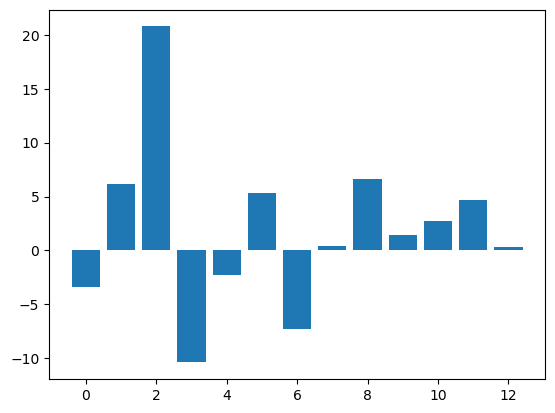

In [63]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()